### Airflow Modulation Analysis in Boiler Systems

In [2]:
# Import necessary libraries
import pandas as pd

# Load the datasets
boiler_input = pd.read_csv('boilerinput.csv')
O2_dataset = pd.read_csv('O2_dataset.csv')

# Display the first few rows of the datasets
print("Boiler Input Dataset:")
print(boiler_input.head(), "\n")

print("O2 Dataset:")
print(O2_dataset.head())


Boiler Input Dataset:
   Unnamed: 0           time  APH-B O/L O2  AH A OUTLET FGS OXYGEN CONTENT  \
0           0  1676313000000      6.993545                        7.159730   
1           1  1676313060000      7.271437                        7.358422   
2           2  1676313120000      7.195898                        7.365289   
3           3  1676313180000      7.128600                        7.232523   
4           4  1676313240000      7.104336                        7.129515   

   AH  INLET FGS OXYGEN CONTENT  APH-A PRIMARY AIR I/L TEMP  \
0                      6.424484                   35.437626   
1                      6.739917                   35.289764   
2                      6.524286                   35.141872   
3                      6.548551                   35.092567   
4                      6.275694                   34.993950   

   LSIDE ECONOMIZER OUTLET FGS TEMP  CHIMNEY FGS CO2 CONTENT  \
0                        298.823059                 6.095218   
1 

Data Cleaning and Pre-processing

In [9]:
# Check for missing values in the relevant columns
print("Missing values in Boiler Input Dataset:")
print(boiler_input.isnull().sum(), "\n")

print("Missing values in O2 Dataset:")
print(O2_dataset.isnull().sum(), "\n")

boiler_input.head()



Missing values in Boiler Input Dataset:
Unnamed: 0                               0
time                                     0
APH-B O/L O2                             0
AH A OUTLET FGS OXYGEN CONTENT         900
AH  INLET FGS OXYGEN CONTENT          1673
APH-A PRIMARY AIR I/L TEMP            2635
LSIDE ECONOMIZER OUTLET FGS TEMP      6200
CHIMNEY FGS CO2 CONTENT               6026
FDF A OUTLET SA TEMP.                 2399
AH B INLET FGS CO CONTENT           357047
SECOND AIR FLOW TOTAL                 1078
WTHR_RH_prc                         209204
Main Steam Flow                        925
PRIMARY AIR FLOW                       762
WTHR_PRS_pa                         209306
WTHR_TEMP_degC                      207233
AH A OUTLET FGS TEMP.                  882
dates                                    0
dtype: int64 

Missing values in O2 Dataset:
time                            19141
BF GAS FLOW BEFORE FGTV         19141
COAL FLOW TOTAL                 19141
Main Steam Flow            

,Unnamed: 0,time,APH-B O/L O2,AH A OUTLET FGS OXYGEN CONTENT,AH INLET FGS OXYGEN CONTENT,APH-A PRIMARY AIR I/L TEMP,LSIDE ECONOMIZER OUTLET FGS TEMP,CHIMNEY FGS CO2 CONTENT,FDF A OUTLET SA TEMP.,AH B INLET FGS CO CONTENT,SECOND AIR FLOW TOTAL,WTHR_RH_prc,Main Steam Flow,PRIMARY AIR FLOW,WTHR_PRS_pa,WTHR_TEMP_degC,AH A OUTLET FGS TEMP.,dates
0,0,1676313000000,6.993545,7.159730,6.424484,35.437626,298.823059,6.095218,26.607584,1.785469,524.085815,NaN,547.232239,231.171829,NaN,NaN,141.974579,2023-02-13 18:30:00
1,1,1676313060000,7.271437,7.358422,6.739917,35.289764,298.783875,5.895218,26.557644,1.785469,524.033569,NaN,538.916626,232.261963,NaN,NaN,142.061020,2023-02-13 18:31:00
2,2,1676313120000,7.195898,7.365289,6.524286,35.141872,298.744690,5.795218,26.557644,1.785469,522.158020,NaN,537.324585,229.003540,NaN,NaN,142.104233,2023-02-13 18:32:00
3,3,1676313180000,7.128600,7.232523,6.548551,35.092567,298.587891,5.895218,26.507700,1.785469,527.498047,NaN,537.997986,226.760498,NaN,NaN,142.104233,2023-02-13 18:33:00
4,4,1676313240000,7.104336,7.129515,6.275694,34.993950,298.470306,5.795218,26.457754,1.785469,522.228027,NaN,539.406616,224.703232,NaN,NaN,142.061020,2023-02-13 18:34:00


In [10]:
# Drop rows with missing values or fill them with appropriate values (if necessary)
boiler_input = boiler_input.dropna(subset=['PRIMARY AIR FLOW', 'AH  INLET FGS OXYGEN CONTENT', 'SECOND AIR FLOW TOTAL'])
O2_dataset = O2_dataset.dropna(subset=['PRIMARY AIR FLOW', 'Steam To Fuel Ratio', 'Air to Fuel Ratio'])

In [13]:
# Ensure that numerical columns are in the correct format
boiler_input = boiler_input.astype({'PRIMARY AIR FLOW': 'float64', 'SECOND AIR FLOW TOTAL': 'float64'})
O2_dataset = O2_dataset.astype({'PRIMARY AIR FLOW': 'float64', 'Steam To Fuel Ratio': 'float64', 'Air to Fuel Ratio': 'float64'})

print("Datasets cleaned and ready for analysis.")


Datasets cleaned and ready for analysis.


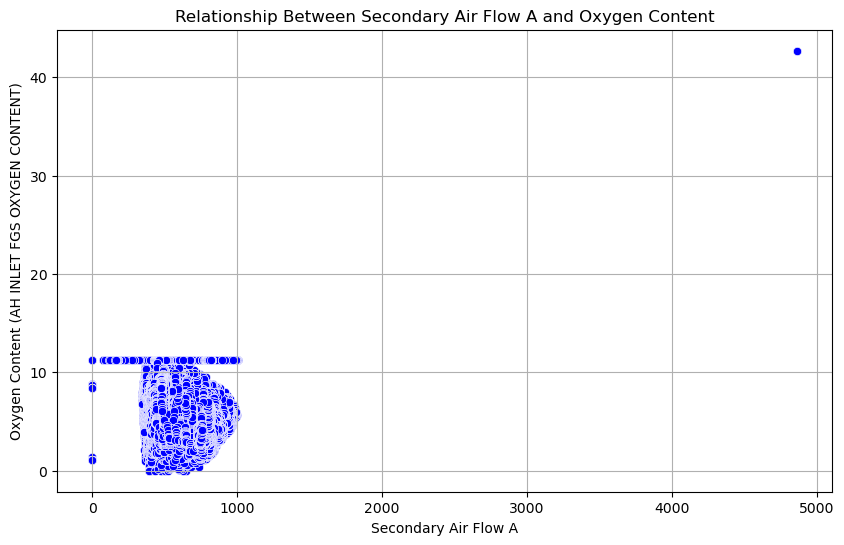

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Secondary Air Flow A and Oxygen Content
plt.figure(figsize=(10, 6))
sns.scatterplot(x=boiler_input['SECOND AIR FLOW TOTAL'], y=boiler_input['AH  INLET FGS OXYGEN CONTENT'], color='blue')
plt.title('Relationship Between Secondary Air Flow A and Oxygen Content')
plt.xlabel('Secondary Air Flow A')
plt.ylabel('Oxygen Content (AH INLET FGS OXYGEN CONTENT)')
plt.grid()
plt.show()

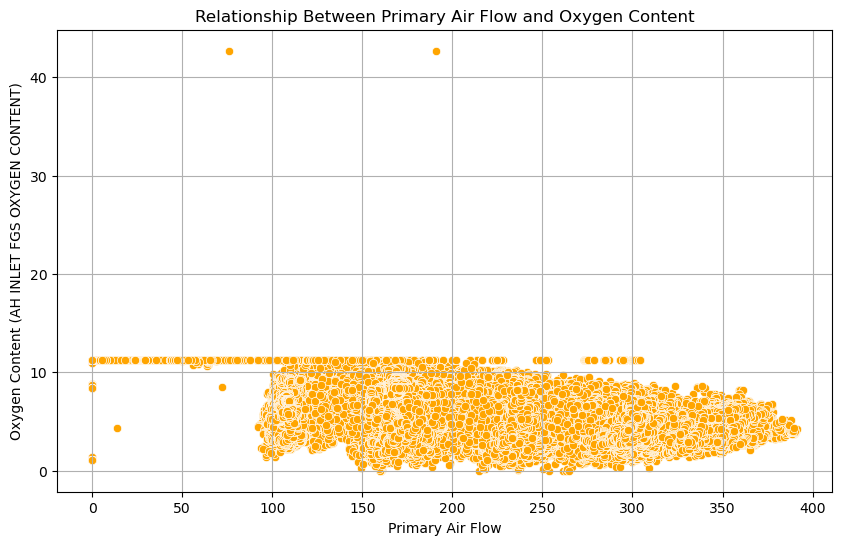

In [15]:
# Scatter plot for Primary Air Flow and Oxygen Content
plt.figure(figsize=(10, 6))
sns.scatterplot(x=boiler_input['PRIMARY AIR FLOW'], y=boiler_input['AH  INLET FGS OXYGEN CONTENT'], color='orange')
plt.title('Relationship Between Primary Air Flow and Oxygen Content')
plt.xlabel('Primary Air Flow')
plt.ylabel('Oxygen Content (AH INLET FGS OXYGEN CONTENT)')
plt.grid()
plt.show()